<h1><img align="right" width="350" src="img/ATU-Logo-Full-RGB-Green.jpg"> Project for Programming and Scripting 
</h1>
<p> 
Course: HDip in Computing in Data Analytics <br>
Module: Programming and Scripting <br>
Lecturer: Andrew Beatty
    
Student: Eilis Donohue (G00006088)

A repository for the analysis conducted as part of the Project assessment for  the Programming and Scripting Module of the HDip in Data Analytics beginning January 2023. 

Software Used: 
 - Python v3.7 and higher
 - Jupyter Notebook 6.4.12   
 </p>

## Table of Contents
HOLD


## Introduction
Fisher's Iris Dataset [x] is a well known dataset dating from the 1930s when analysis of it was published in the Annual Eugenics journal [XX] by the academic R.A. Fischer. 

R.A. Fisher was an English polymath who was active in the fields of mathematics, statistics, biology and genetics [xx] and made many important contributions to the field of statistical analysis (i.e., Fisher's exact test XXXXXX). The iris dataset comprises 50 measurements each of three distinct classes of iris flower found growing in the same meadow. The length and width of the sepal and petal for each flower along with the class or iris type is recorded in the dataset [XX].

The original paper described a statistical method of linear discriminant analysis. The dataset is still widely referenced today and is still used as a training set for discriminant analysis in machine learning applications.

Fisher's paper [XX] described a statistical method for determining class based on the measurement data which became known as Linear Discriminant Analysis (LDA).

The aim of this analysis is analyse the dataset using Python, outputting a statistical summary and plots of the data to give insight into the dataset and illustrate trends in the data.

In [1]:
# Importing modules and libraries for the analysis code.
import os
import glob
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
# Setting the ticks on the x and y axis
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from IPython.display import display
%matplotlib inline
# setting the filenames for the text file summary output
summary_filename = "summary/summary_statistics.txt"
corr_filename = "summary/correlation.txt"

In [2]:
# ************************ Function definitions ***************************
# Function to calculate the basic statistics of a dataset
def get_summary_stats(data, item=''):
    # Get the basic stats 
    summary_df = pd.DataFrame()
    summary_df['Min (cm)'] = data.min()
    summary_df['Max (cm)'] = data.max()
    summary_df['Mean (cm)'] = data.mean()
    summary_df['Median (cm)'] = data.median()
    summary_df['StDev (cm)'] = data.std()
    summary_df['Variance (cm)'] = data.var() 
    return summary_df

# Function to write a summary of the data to a file 
def write_to_file(summary_filename, df_data, heading, dec_format="%.2f"):   
    with open (summary_filename, 'at') as f:
        # Use to_string for nice formatting for the text file
        df_summary_asstr = df_data.to_string(float_format=dec_format, 
                                                justify='center')
        # write header and data 
        f.write(f'***************** {heading} *****************\n')
        f.write(f'{df_summary_asstr}\n')
        f.write('\n')

# Function to plot histograms of each variable 
def plot_histograms(data, var):   
        plt.figure()
        sns.histplot(data, x=var, hue="Class", binwidth=0.2, kde=True)
        plt.savefig(f'plots/histogram_{var}.png')  

# Run pandas correlation method
def get_corr(data):
    return data.corr()

# Styler for Jupyter notebook table display
def my_styler(df, precision, caption):
    df_styler = df.style.format(precision=precision).set_caption(caption)
    return df_styler
def styler_highlight_between(df_styler, left, right):
    df_styler = df_styler.highlight_between(color='yellow', axis=0, left=left, right=right, inclusive='both', props=None) 
    return df_styler


## Summary Statistics 

The summary statistics of the entire dataset and the statistics for each class separately are shown in the tables below. All measurements are in centimetres unless otherwise stated.

In [3]:
# ***************************** Reading in data ******************************
# Read in the data from the source file - no header  
data = pd.read_csv('data/iris.data', header=None)
# Make a list of the columns
variables = ["Sepal Length", "Sepal Width", "Petal Length",
             "Petal Width", "Class"]
# List of variables without class
variables_wo_class = variables[:-1]
# Assign the header to the data
data.columns = variables

# get the different classifications
class_names = data["Class"].unique()
# dataframe without class column
data_wo_class = data.drop(columns="Class").copy()
# Delete anything in summary directory
files = glob.glob('summary/*')
for f in files:
    os.remove(f)
    
# Get the statistics for the whole dataset and write to file
df_summary_all = get_summary_stats(data.drop(columns="Class"))
write_to_file(summary_filename, df_summary_all, "All data")
df_styler = my_styler(df_summary_all, 2, "Summary All")
summary_styler_list = [df_styler]
df_corr_all = get_corr(data)
write_to_file(corr_filename, df_corr_all, "All data", "%.3f")
#print("Title")
df_styler = my_styler(df_corr_all, 2, "Corellation All Data")
df_styler = styler_highlight_between(df_styler, 0.7, 0.99)
df_styler = styler_highlight_between(df_styler, -0.7, -0.99)
corr_styler_list = [df_styler]

corr_styler_list = [df_styler]
for item in class_names:
    # Extract the data related to one class of iris
    iris_data = data[data["Class"] == item].copy()
    # Strip the class column before passing to function
    iris_data.drop(columns = "Class", inplace=True) 
    # Get the stats and write to file
    df_summary = get_summary_stats(iris_data)
    df_styler_stats = my_styler(df_summary, 2, item+" Summary Statistics")
    summary_styler_list.append(df_styler_stats)   
    #   write_to_file(summary_filename, df_summary, item)
    df_corr =  get_corr(iris_data)      
  #  write_to_file(corr_filename, df_corr, item, "%.2f")
  #  df_styler = df_corr.style.format(precision=2).set_caption(item+" Correlation")
   # df_styler = df_styler.background_gradient(axis=None, vmin=0.75, vmax=0.99, cmap='YlOrRd')
    df_styler = my_styler(df_corr, 2, item+" Correlation")
    df_styler = styler_highlight_between(df_styler, 0.7, 0.99)
    df_styler = styler_highlight_between(df_styler, -0.7, -0.99)
    corr_styler_list.append(df_styler)
#    display(df_styler)
    
for item in summary_styler_list:
    display(item)


,Min (cm),Max (cm),Mean (cm),Median (cm),StDev (cm),Variance (cm)
Sepal Length,4.30,7.90,5.84,5.80,0.83,0.69
Sepal Width,2.00,4.40,3.05,3.00,0.43,0.19
Petal Length,1.00,6.90,3.76,4.35,1.76,3.11
Petal Width,0.10,2.50,1.20,1.30,0.76,0.58


,Min (cm),Max (cm),Mean (cm),Median (cm),StDev (cm),Variance (cm)
Sepal Length,4.30,5.80,5.01,5.00,0.35,0.12
Sepal Width,2.30,4.40,3.42,3.40,0.38,0.15
Petal Length,1.00,1.90,1.46,1.50,0.17,0.03
Petal Width,0.10,0.60,0.24,0.20,0.11,0.01


,Min (cm),Max (cm),Mean (cm),Median (cm),StDev (cm),Variance (cm)
Sepal Length,4.90,7.00,5.94,5.90,0.52,0.27
Sepal Width,2.00,3.40,2.77,2.80,0.31,0.10
Petal Length,3.00,5.10,4.26,4.35,0.47,0.22
Petal Width,1.00,1.80,1.33,1.30,0.20,0.04


,Min (cm),Max (cm),Mean (cm),Median (cm),StDev (cm),Variance (cm)
Sepal Length,4.90,7.90,6.59,6.50,0.64,0.40
Sepal Width,2.20,3.80,2.97,3.00,0.32,0.10
Petal Length,4.50,6.90,5.55,5.55,0.55,0.30
Petal Width,1.40,2.50,2.03,2.00,0.27,0.08


## Correlation Tables

The correlation tables for the data are shown below (correlation was peformed with Pandas method .corr() [XX]). Correlation values higher than 0.75 are highlighted [xx]. In the full dataset, high values of correlation are noted for Petal Length/Petal Width, Petal Length/Sepal Length and Petal Width/Sepal Length. The correlation trends are illustrated in the pairplot in the next section.

In [55]:
for item in corr_styler_list:
    display(item)

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.00,-0.11,0.87,0.82
Sepal Width,-0.11,1.00,-0.42,-0.36
Petal Length,0.87,-0.42,1.00,0.96
Petal Width,0.82,-0.36,0.96,1.00


,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.00,0.75,0.26,0.28
Sepal Width,0.75,1.00,0.18,0.28
Petal Length,0.26,0.18,1.00,0.31
Petal Width,0.28,0.28,0.31,1.00


,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.00,0.53,0.75,0.55
Sepal Width,0.53,1.00,0.56,0.66
Petal Length,0.75,0.56,1.00,0.79
Petal Width,0.55,0.66,0.79,1.00


,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.00,0.46,0.86,0.28
Sepal Width,0.46,1.00,0.40,0.54
Petal Length,0.86,0.40,1.00,0.32
Petal Width,0.28,0.54,0.32,1.00


## Scatter Plots 

The pair plot below shows the scatter plots for all the variables, coloured by iris type. The linear distinctness between iris Setosa and the other iris types is clearly illustrated for all combinations of variables. 

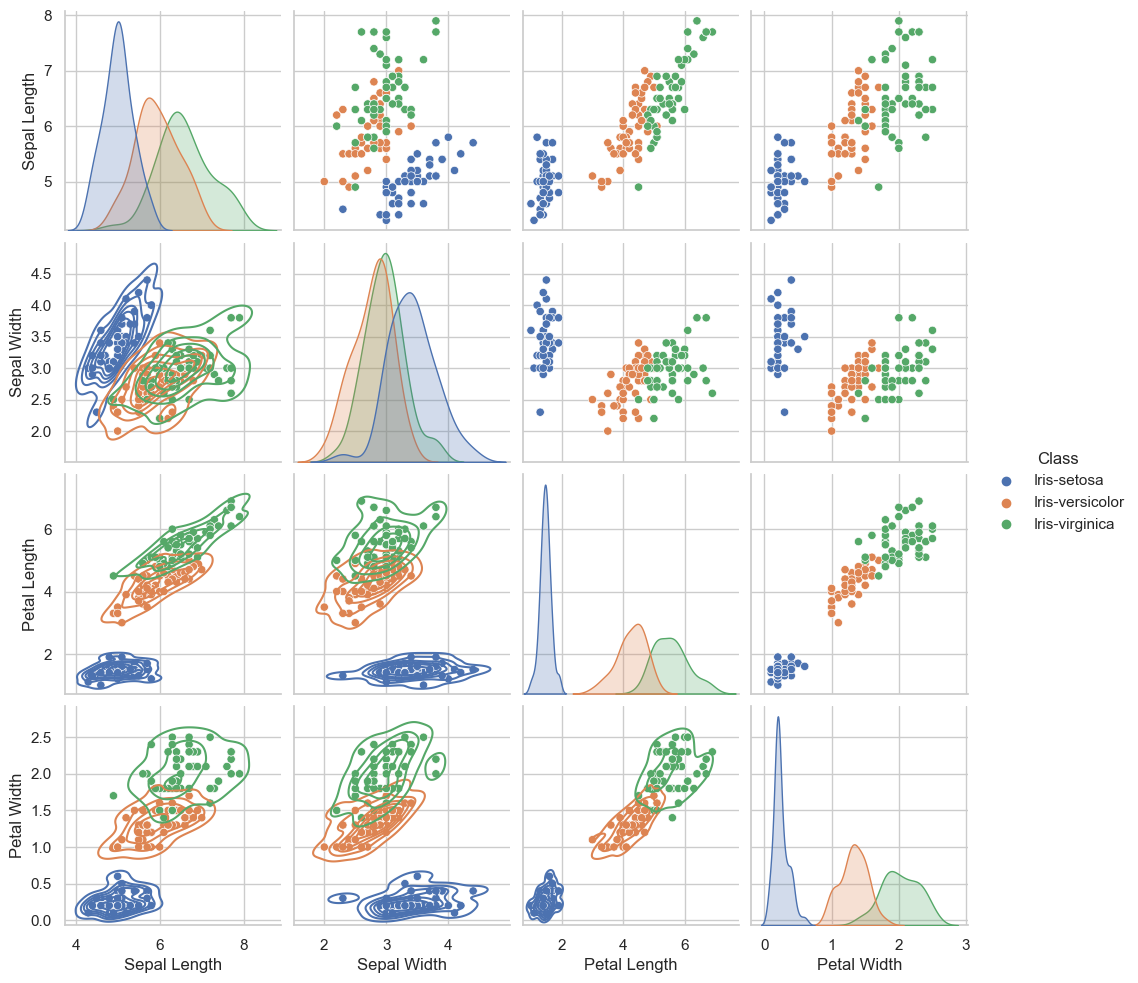

In [34]:
sns.set_theme(style='whitegrid')
g = sns.pairplot(data, hue="Class", diag_kind="kde")
g.map_lower(sns.kdeplot, levels=7, color=".2")
g.savefig("plots/pairplot.png")
plt.show()


<Figure size 640x480 with 0 Axes>

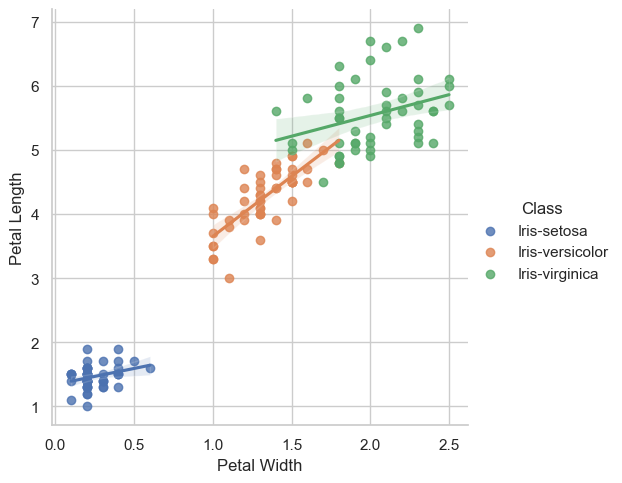

In [28]:
plt.figure()
# Plot a scatter with linear regression
sns.lmplot(x ='Petal Width', y ='Petal Length', data = data, hue="Class")
plt.show()
#plt.savefig("plots/petal_scatter.png")

## Histograms
The histograms below show the distribution of each of the four iris variables.
- Qualitatively, all the variables have approximately a bell-shaped (normal) distribution.
- This distinction is less pronounced for sepal width and length. This distinction can also be seen in the scatter plots above. 
- The smaller values of standard distribution for the iris-setosa are illustrated in these plots

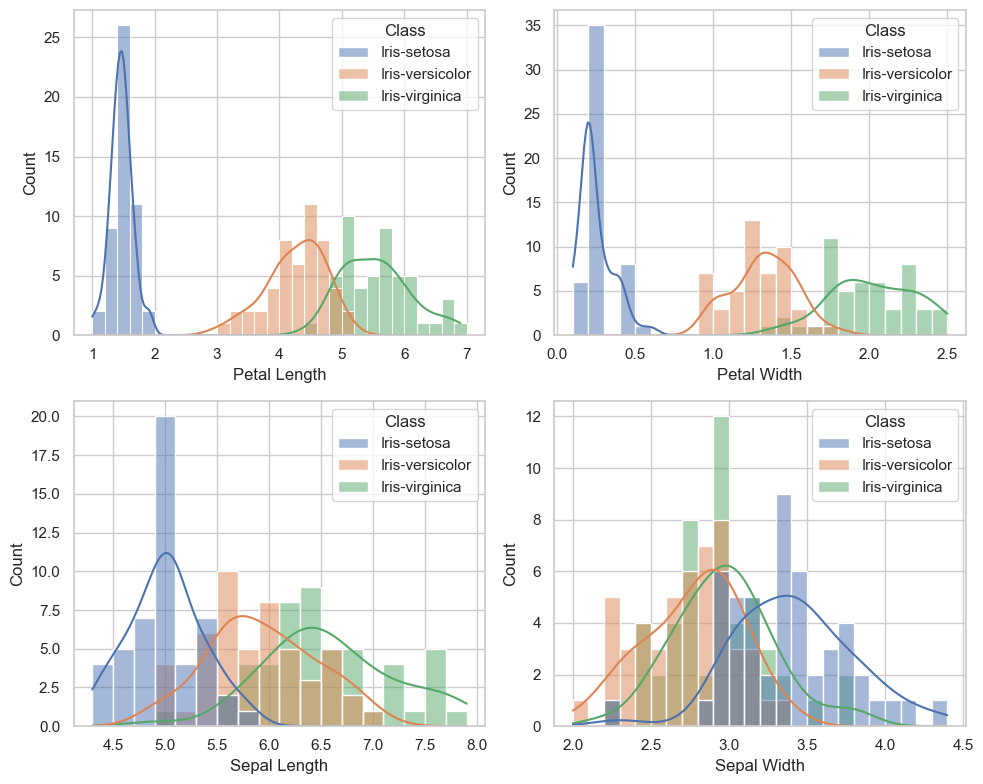

In [11]:
# Plot the histograms for each variable in the dataset in one figure
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(nrows = 2, ncols =2, figsize=(10,8))
sns.histplot(data, x="Petal Length", hue="Class", binwidth=0.2, kde=True, ax=ax[0,0])
sns.histplot(data, x="Petal Width", hue="Class", binwidth=0.1, kde=True, ax=ax[0,1])
sns.histplot(data, x="Sepal Length", hue="Class", binwidth=0.2, kde=True, ax=ax[1,0])
sns.histplot(data, x="Sepal Width", hue="Class", binwidth=0.1, kde=True, ax=ax[1,1])
fig.tight_layout()
plt.savefig("plots/4_plot_histogram.png")
plt.show()